### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量：一致文字/不一致文字的列表；**  
**因变量：回答出列表中墨色名称的时间。**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**_H_<sub>0</sub>:**Congruent = Incongruent  
**_H_<sub>1</sub>:**Congruent =! Incongruent  

**Congruent为一致文字条件下说出墨色名称的时间，Incongruent为不一致文字条件下说出墨色名称的时间。**  
**因为在Stroop任务中，我们研究的问题是墨色与文字不一致是否会对说出墨色名称的时间产生影响，所以我们假设不会产生影响，备择假设与之相反，我们执行双尾T检验来验证我们的问题。**

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [23]:
# 加载包
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
% matplotlib inline

# 导入数据
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [24]:
# 查看描述性统计
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**可以看出：**  
**一致文字条件下，样本中回答墨色名称的平均时间为14.05s，标准差为3.56s；**  
**不一致文字条件下，样本中回答墨色名称的平均时间为22.02s，标准差为4.80s。**

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

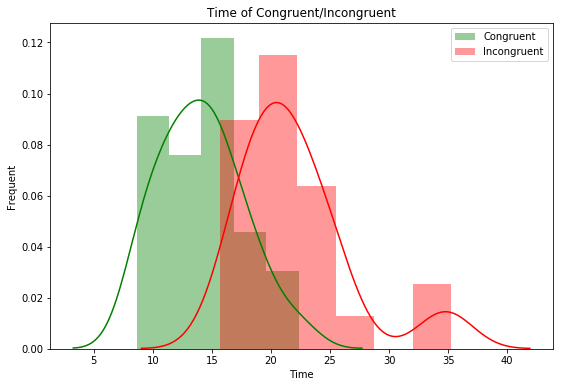

In [25]:
# 在这里创建可视化图表
plt.figure(figsize = (9,6))
sns.distplot(df.Congruent, kde=True,color='g',label="Congruent")
sns.distplot(df.Incongruent, kde=True,color='r',label="Incongruent")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequent')
plt.title('Time of Congruent/Incongruent');

I:\anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


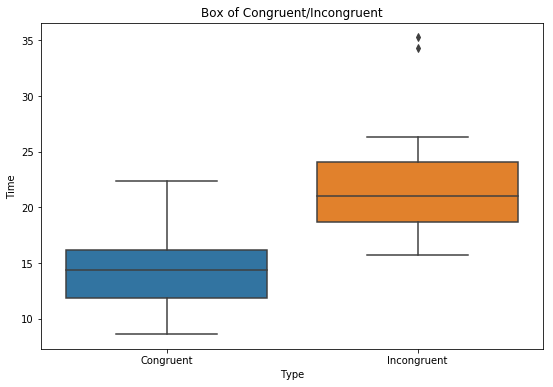

In [26]:
plt.figure(figsize = (9,6))
sns.boxplot(data=df)
plt.xlabel('Type')
plt.ylabel('Time')
plt.title('Box of Congruent/Incongruent');

I:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


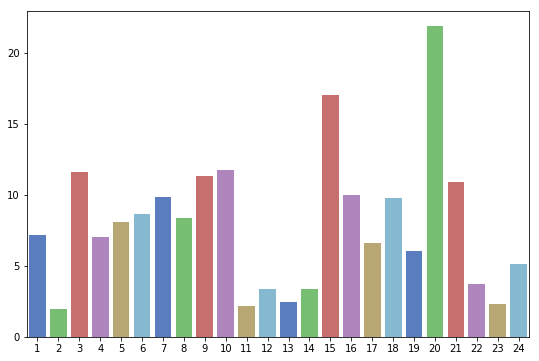

In [27]:
plt.figure(figsize = (9,6))
x = df.Incongruent.index + 1
y = df.Incongruent - df.Congruent
sns.barplot(x, y, palette='muted');

**（1）从图一的直方图中可以看出，不一致文字条件下的读出时间在一致文字条件下的右侧，整体时间大于一致文字条件，一致文字条件下的读出时间大致分布在8s到23s之间，而不一致文字条件下的读出时间大致分布在16s到35s之间；**  
**（2）我们通过图二的箱线图可以佐证这一观点，而且不一致文字条件下的读出时间的平均值和中位数均大于一致文字条件下的读出时间；**  
**（3）图三是不一致文字条件下的读出时间与一致文字条件下的读出时间的差值柱形图，可以看出每一组的差值均大于0，也就是说每一组的不一致文字条件下的读出时间大于一致文字条件下的读出时间。**

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [31]:
# 在这里执行统计检验
# 检验双样本是是异方差还是等方差
stats.levene(df.Incongruent, df.Congruent)

LeveneResult(statistic=0.2502499448677214, pvalue=0.61928406991282192)

**p值远大于0.5，我们两个样本方差具有方差齐性，所以我们用双尾等方差的t检验来验证假设。**

In [32]:
stats.ttest_ind(df.Incongruent, df.Congruent)

Ttest_indResult(statistic=6.5322505539032285, pvalue=4.5949489622951854e-08)

**我们假定置信水平为95%，通过双尾等方差t检验，我们得出p值为4.5949489622951854e-08，远小于显著性水平的5%，因此我们拒绝原假设，即有证据可以证明“不一致的文字条件下对读出墨色名称的时间不会产生影响”的假设不成立。该结果与我们期望的结果一致。**